In [1]:
#by Eng.Mary Alrayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Salaries.csv')
# printing first 5 rows
print(df.head())


   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

# Basic Data Exploration

In [3]:
#print number of rows and number of columns
print('--------------------------------')
print('(rows,columns): '+str(df.shape))


--------------------------------
(rows,columns): (148654, 13)


In [4]:
#print columns names
print('Columns Names')
print(df.columns)


Columns Names
Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')


In [5]:
print('--------------------------------')
#print general info
print('Info\n')
print(df.info())


--------------------------------
Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


In [6]:
#print columns data types
print('Columns Data Types')
print(df.dtypes)


Columns Data Types
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [7]:
# get how many null values in each column (missing values)
print('Null values')
print(df.isnull().sum())


Null values
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Descriptive Statistics

In [8]:
#printing statistical description of the data of all numerical columns (mean, min, max, median, std)
print('--------------------------------')
print('Describe')
print(df.describe())

--------------------------------
Describe
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448841    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000

In [9]:
#Another way to calculate the salary statistics
mean = df['TotalPay'].mean()
median = df['TotalPay'].median()
mode = df['TotalPay'].mode()
min =df['TotalPay'].min()
max =df['TotalPay'].max()
std=df['TotalPay'].std()

print('Salary Statistics')
print('Mean: ',mean)
print('Median: ',median)
print('Mode: ',mode)
print('Minimum: ',min)
print('Maximum: ',max)
print('Standard Deviation: ',std)

Salary Statistics
Mean:  74768.321971703
Median:  71426.60999999999
Mode:  0    0.0
dtype: float64
Minimum:  -618.13
Maximum:  567595.43
Standard Deviation:  50517.005273949944


In [37]:
# range of the salaries
salary_values = df['TotalPay'].value_counts()
print(salary_values)



0.00         368
18594.00      82
123290.70     56
132242.50     49
105489.00     42
            ... 
82089.93       1
48772.80       1
77232.87       1
3501.37        1
738.50         1
Name: TotalPay, Length: 138486, dtype: int64


# Data Cleaning

In [11]:
#making new copy of the data before dealing with dealing with missing values
df2 = df.copy()

In [14]:
#BasePay                609 null values
print('BasePay data ')
print(df['BasePay'].value_counts())
# filling the basepay column with the average value because
# it seems reasonable to set the average for the missing values of the base salary
df2['BasePay']= df2['BasePay'].fillna(df2["BasePay"].mean())


print('----------------------------')
# for the OvertimePay, OtherPay, and Benefits columns, I set the mode for the missing values because the mode is

#OvertimePay              4  null values
print('OvertimePay data ')
print(df['OvertimePay'].value_counts())
df2['OvertimePay']= df2['OvertimePay'].fillna(df2["OvertimePay"].mode()[0])

print('----------------------------')

#OtherPay                 4 null values
print('OtherPay data ')
print(df['OtherPay'].value_counts())
df2['OtherPay']= df2['OtherPay'].fillna(df2["OtherPay"].mode()[0])


print('----------------------------')


#Benefits             36163 null values
print('Benefits data ')
print(df['Benefits'].value_counts())
df2['Benefits']= df2['Benefits'].fillna(df2["Benefits"].mode()[0])


print('----------------------------')

# adjusting the (total salary) and the (total salary with benefits) after handling
# the missing values for the other columns
df2['TotalPay']=df2['BasePay']+df2['OvertimePay']+df2['OtherPay']
df2['TotalPayBenefits']=df2['TotalPay']+df2['Benefits']

BasePay data 
0.00        1298
54703.00     338
55026.00     297
48472.40     210
65448.00     153
            ... 
79070.51       1
50993.45       1
23296.84       1
96647.84       1
94702.00       1
Name: BasePay, Length: 109489, dtype: int64
----------------------------
OvertimePay data 
0.00        77321
681.23         41
10.68          41
152.13         38
1314.78        27
            ...  
1937.75         1
9049.10         1
1751.22         1
8401.41         1
18726.02        1
Name: OvertimePay, Length: 65998, dtype: int64
----------------------------
OtherPay data 
0.00        41600
624.00       2092
250.00        907
648.00        739
3486.00       516
            ...  
8840.03         1
5224.04         1
28462.78        1
1716.86         1
3077.27         1
Name: OtherPay, Length: 83225, dtype: int64
----------------------------
Benefits data 
0.00        1734
7959.18      348
4659.36      107
25699.20      83
37055.22      82
            ... 
56336.88       1
28921.51      

In [5]:

# Notes               148654 null values
print('Notes data ')
print(df['Notes'].value_counts())


# Status              148654 null values
print('Status data ')
print(df['Status'].value_counts())


# deleting status and notes columns as they have no values
df2.drop(columns=["Notes","Status"],inplace=True,errors='ignore')



Notes data 
Series([], Name: Notes, dtype: int64)
Status data 
Series([], Name: Status, dtype: int64)


In [6]:
# confirming all missing values are handled
print(df2.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# Basic Data Visualization

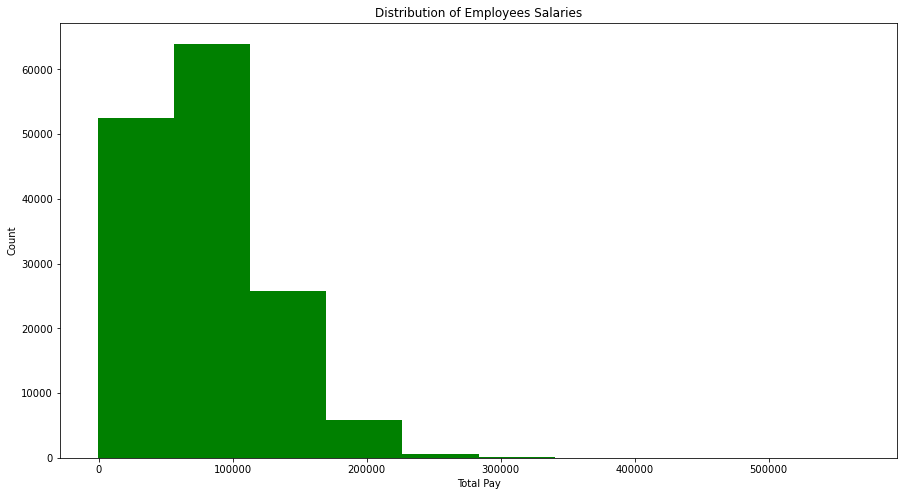

In [10]:
# histogram of the salaries
plt.figure(figsize=(15,8))

plt.hist(df2['TotalPay'],color='green')

plt.ylabel('Count')
plt.xlabel('Total Pay')
plt.title('Distribution of Employees Salaries')
plt.show()

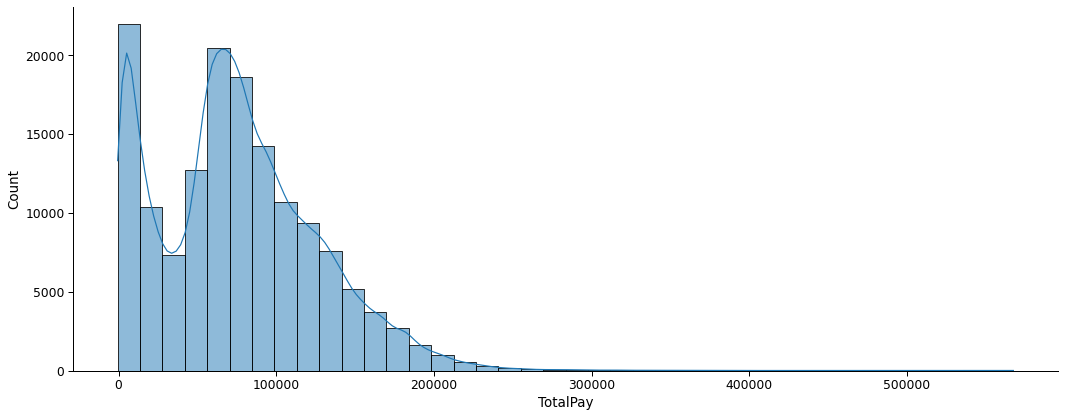

In [166]:
# another way to display the histogram along with KDB of the salaries
sns.displot(df2['TotalPay'], kde=True, bins=40, height=6, aspect=2.5)

# we can see the salaries range from 0 to 300000

{'Transit Operator': 7036, 'Special Nurse': 4389, 'Registered Nurse': 3736, 'Public Svc Aide-Public Works': 2518, 'Police Officer 3': 2421, 'Custodian': 2418, 'TRANSIT OPERATOR': 2388, 'Firefighter': 2359, 'Recreation Leader': 1971, 'Patient Care Assistant': 1945, 'others': 117473}


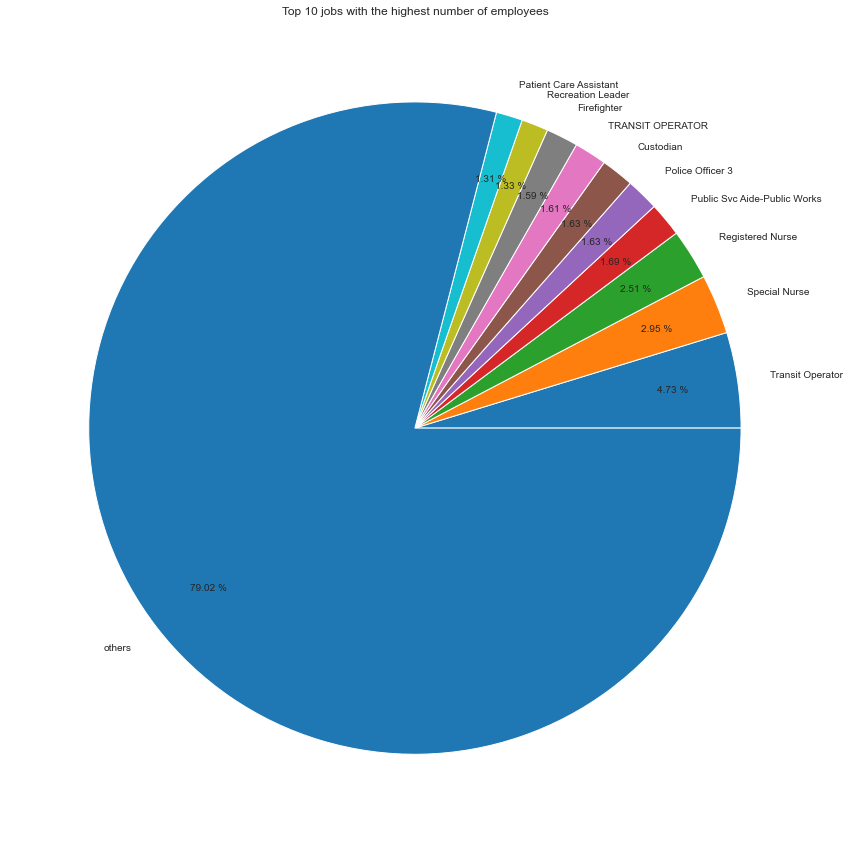

In [54]:
#calculating the proportion of employees in different jobs

employees_by_job=df2['JobTitle'].value_counts()
#taking the top 10 jobs with the highest number of employees
top_ten_jobs = employees_by_job[:10]
# taking the sum for the other jobs
others = employees_by_job[10:].sum()
# converting the top 10 jobs dictionary
employees_by_job_dict = top_ten_jobs.to_dict()
# appending the other jobs to the dictionary
employees_by_job_dict['others']=others

print(employees_by_job_dict)

#plotting the pie chart
fig = plt.figure(figsize=(30,15))
fig.patch.set_facecolor('white')
plt.pie(employees_by_job_dict.values(), labels = employees_by_job_dict.keys(),  autopct='%.2f %%',pctdistance=0.8)
plt.title('Top 10 jobs with the highest number of employees')
plt.show()



# Grouped Analysis

{2011: 36159, 2012: 36766, 2013: 37606, 2014: 38123}


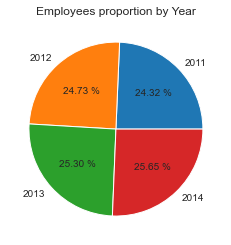

In [31]:
# grouping employees by year
employees_by_year = df2.groupby(['Year']).count()['Id']
employees_by_year_dict = employees_by_year.to_dict()
print(employees_by_year_dict)

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(employees_by_year_dict.values(), labels = employees_by_year_dict.keys(),  autopct='%.2f %%')
plt.title('Employees proportion by Year')
plt.show()


In [196]:
groups_by_year=df2.groupby(['Year'])

# calculating mean, std, minimum,maximum for all numerical columns grouping by the year

mean_by_year = groups_by_year.mean()
print('Mean by Year')
print(mean_by_year)

print('----------------------------------')
std_by_year = groups_by_year.std()
print('Std by Year')
print(std_by_year)

print('----------------------------------')
mini_by_year = groups_by_year.min()
print('Minimum by Year')
print(mini_by_year)

print('----------------------------------')
maxi_by_year = groups_by_year.max()
print('Maximum by Year')
print(maxi_by_year)

Mean by Year
            Id       BasePay  OvertimePay     OtherPay      Benefits  \
Year                                                                   
2011   18080.0  63595.956517  4531.065429  3617.081926      0.000000   
2012   54542.5  65436.406857  5023.417824  3653.437583  26439.966967   
2013   91728.5  69576.866579  5281.641980  3819.969007  23829.076572   
2014  129593.0  66564.396851  5401.426941  3505.053449  24787.000743   

          TotalPay  TotalPayBenefits  
Year                                  
2011  71744.103871      71744.103871  
2012  74113.262265     100553.229232  
2013  78678.477566     102507.554138  
2014  75470.877241     100257.877984  
----------------------------------
Std by Year
                Id       BasePay   OvertimePay     OtherPay      Benefits  \
Year                                                                        
2011  10438.348528  40556.774993  10501.367793  7959.889157      0.000000   
2012  10613.574335  41782.209797  11431.88

Year
2011    71744.103871
2012    74113.262265
2013    78678.477566
2014    75470.877241
Name: TotalPay, dtype: float64


Text(0.5, 1.0, 'Average Salaries by Year')

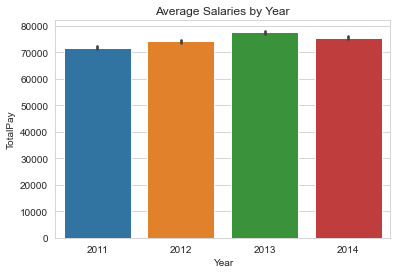

In [26]:
#comparing the average salaries across the years
salaries_average_by_year=df2.groupby(['Year'])['TotalPay'].mean()
print(salaries_average_by_year)

# plotting the average salary for each year
sns.set_style("whitegrid")
sns.barplot(x="Year", y ="TotalPay", data=df, )
plt.title('Average Salaries by Year')


# Simple Correlation Analysis

<AxesSubplot:>

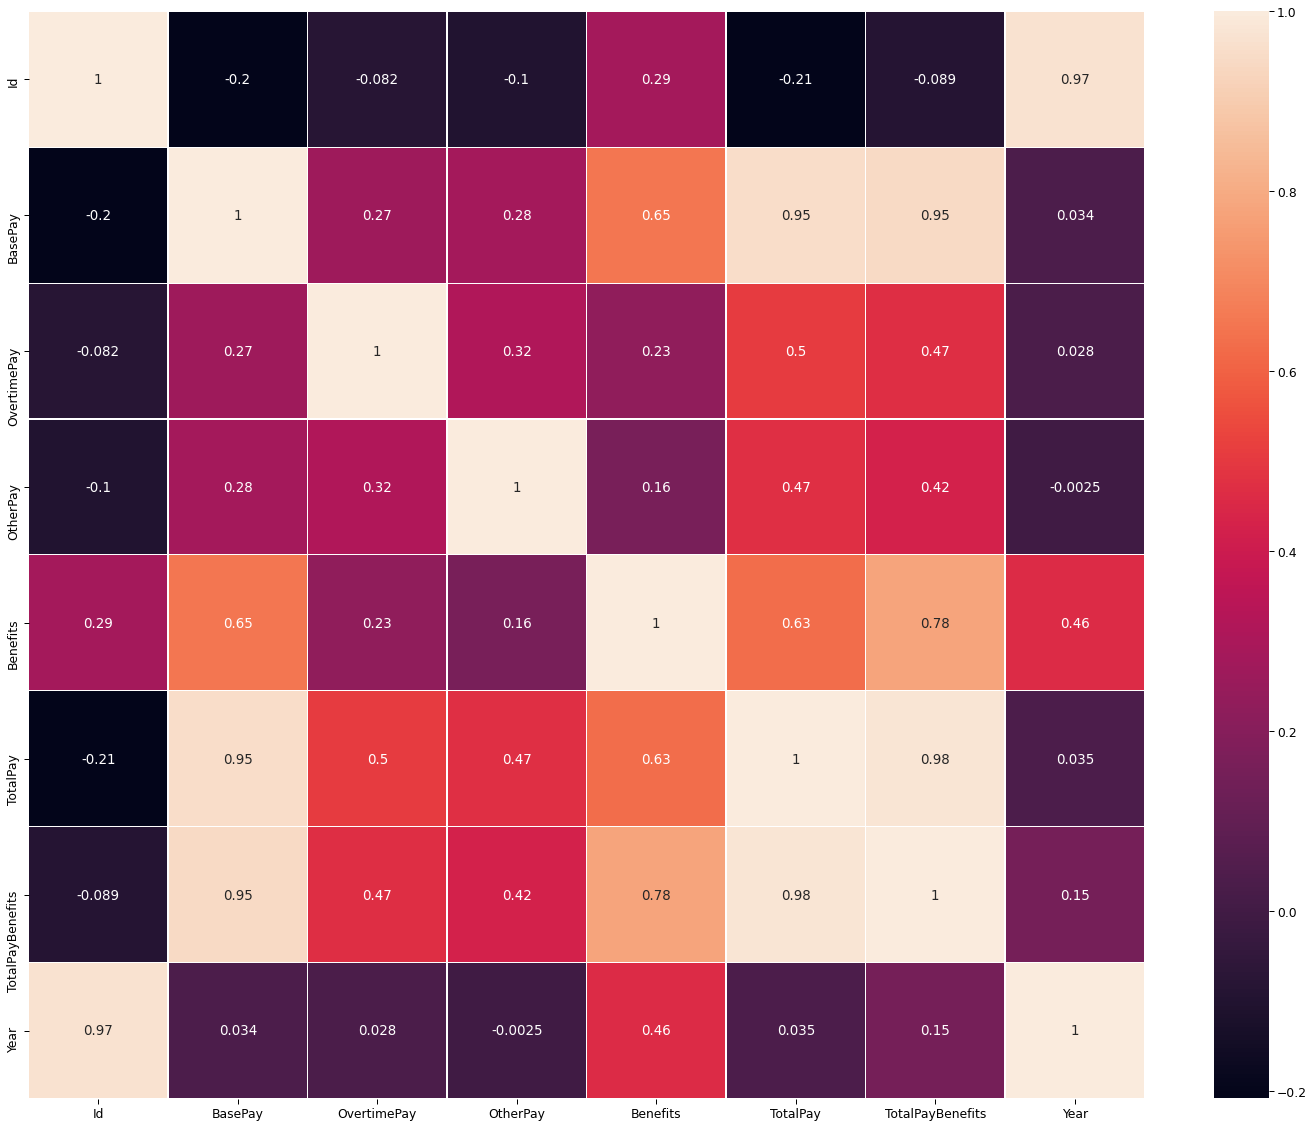

In [126]:
# calculating the correlation between all numerical columns
corrMatrix = df2.corr()

# heat map to display the correlation
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(corrMatrix, annot=True, linewidth=0.01, )

Id                  0.208200
BasePay             0.954318
OvertimePay         0.504495
OtherPay            0.472872
Benefits            0.630441
TotalPay            1.000000
TotalPayBenefits    0.977065
Year                0.034557
Name: TotalPay, dtype: float64


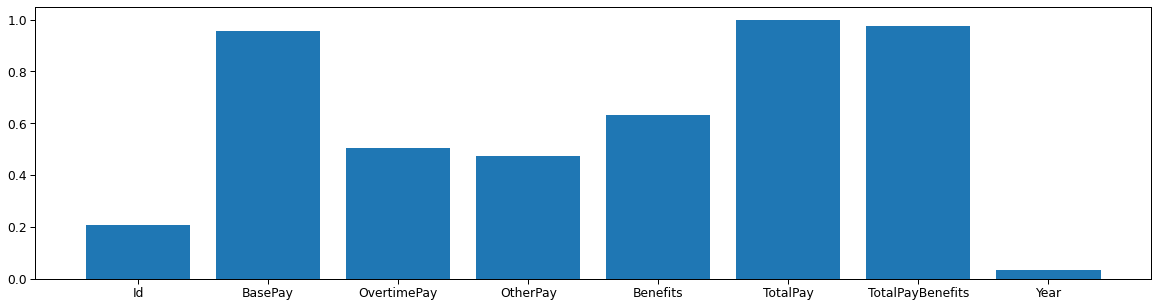

In [127]:
# taking the correlation only between Salary and other columns
correaltion_target = abs(corrMatrix["TotalPay"])
print(correaltion_target)

#converting the correlation series to dictionary
dic=correaltion_target.to_dict()

#ploting the correlation in a bar chart
# we realize that the basePay and the totalPayBenefits have the highest correlation with the salary
plt.figure(figsize=(20,5))
plt.bar(dic.keys(),dic.values())
plt.show()


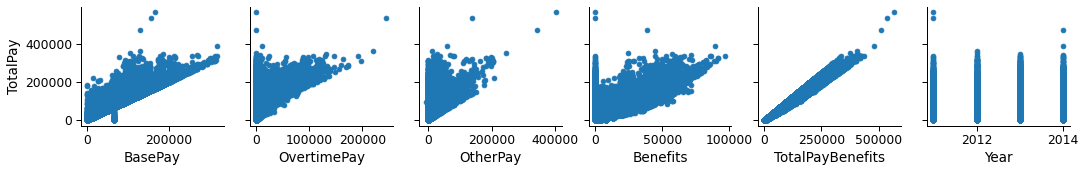

In [103]:
# numerical columns
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPayBenefits', 'Year']

# ploting a scatter grid for the salary and each numerical column
sns.set_context('paper', font_scale=1.4)

salary_g = sns.PairGrid(df2,
                      x_vars=numerical_columns,
                      y_vars=["TotalPay"]
                      )

salary_g.map(plt.scatter)

